In [12]:
import datetime
import pandas as pd
import numpy as np
import scipy as sp
from scipy import stats
import matplotlib as plt
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# density

In [13]:
fn = r'C:\Users\Default\Documents\transect_densities.xlsx'
xl = pd.read_excel(fn, engine='openpyxl', sheet_name=None, parse_dates=True, index_col=0)
xl.keys()

for values in xl.keys():
    print(xl[values])

   1955-05-31  1955-06-11  1955-06-23  1955-07-04  1955-11-10  1955-11-22  \
0        0.32        0.37        0.33        0.39        0.40        0.26   
1        0.28        0.34        0.39        0.33        0.22        0.26   
2        0.32        0.32        0.37        0.44        0.23        0.23   
3        0.29        0.31        0.39        0.38        0.24        0.24   
4        0.27        0.36        0.32        0.40        0.20        0.28   
5        0.30        0.30        0.40        0.30        0.24        0.26   
6        0.33        0.36        0.37        0.41        0.26        0.26   
7        0.28        0.35        0.38        0.39        0.26        0.26   
8        0.31        0.32         NaN        0.47        0.34        0.30   
9        0.29        0.31         NaN        0.35        0.26        0.26   

   1955-11-30  1955-12-31  1956-01-29  1956-02-27  1956-03-29  
0        0.26        0.28        0.20        0.27        0.30  
1        0.27        0.2

In [14]:
for values in xl.keys():
    
    xl[values].loc['avg'] = xl[values].mean()
    xl[values].loc['stdv'] = xl[values].std()

    xl[values] = xl[values].T
    xl[values] = xl[values].resample('10D').mean()

    xl[values].reset_index(inplace=True)
    xl[values]['day'] = xl[values]['index'].dt.day
    xl[values]['month'] = xl[values]['index'].dt.month
    xl[values]['year'] = xl[values]['index'].dt.year

    xl[values] = xl[values].sort_values(by="index")
    xl[values].set_index('index', inplace=True)
    
    cols = ['month']
    xl[values][cols] = xl[values][xl[values][cols] != 5][cols]
    xl[values].dropna(inplace=True)
    
    cols = ['month']
    xl[values][cols] = xl[values][xl[values][cols] != 6][cols]
    xl[values].dropna(inplace=True)

    cols = ['month']
    xl[values][cols] = xl[values][xl[values][cols] != 7][cols]
    xl[values].dropna(inplace=True)

    cols = ['month']
    xl[values][cols] = xl[values][xl[values][cols] != 8][cols]
    xl[values].dropna(inplace=True)

    print(xl[values])

               0     1     2     3     4     5     6     7     8     9    avg  \
index                                                                           
1955-11-07  0.40  0.22  0.23  0.24  0.20  0.24  0.26  0.26  0.34  0.26  0.265   
1955-11-17  0.26  0.26  0.23  0.24  0.28  0.26  0.26  0.26  0.30  0.26  0.261   

                stdv  day  month  year  
index                                   
1955-11-07  0.057140    7   11.0  1955  
1955-11-17  0.018138   17   11.0  1955  
               0     1     2     3     4     5     6     7     8     9    avg  \
index                                                                           
1958-04-26  0.32  0.29  0.38  0.34  0.36  0.31  0.35  0.33  0.29  0.34  0.331   
1958-11-02  0.25  0.26  0.26  0.24  0.25  0.23  0.25  0.25  0.24  0.24  0.247   
1958-12-02  0.34  0.30  0.27  0.27  0.26  0.25  0.26  0.28  0.26  0.28  0.277   
1959-01-01  0.28  0.26  0.25  0.26  0.26  0.28  0.27  0.28  0.24  0.28  0.266   
1959-01-31  0.28  0.26  0

               0     1     2     3     4     5     6     7     8     9    avg  \
index                                                                           
1968-09-17  0.18  0.27  0.20  0.30  0.22  0.25  0.39  0.25  0.22  0.22  0.250   
1968-10-17  0.28  0.41  0.32  0.37  0.25  0.29  0.41  0.36  0.33  0.34  0.336   
1968-11-16  0.34  0.26  0.30  0.31  0.28  0.31  0.30  0.28  0.30  0.31  0.299   
1968-12-16  0.28  0.25  0.29  0.34  0.33  0.30  0.32  0.26  0.30  0.29  0.296   
1969-01-15  0.35  0.36  0.30  0.32  0.29  0.28  0.35  0.28  0.33  0.29  0.315   
1969-02-14  0.41  0.33  0.29  0.31  0.33  0.38  0.34  0.31  0.34  0.32  0.336   
1969-03-16  0.31  0.35  0.30  0.35  0.38  0.32  0.34  0.29  0.36  0.34  0.334   
1969-04-15  0.35  0.36  0.32  0.34  0.31  0.32  0.33  0.38  0.33  0.32  0.336   
1969-09-12  0.30  0.33  0.32  0.32  0.33  0.33  0.33  0.33  0.33  0.31  0.323   
1969-10-12  0.34  0.33  0.29  0.29  0.32  0.33  0.32  0.34  0.31  0.33  0.320   
1969-11-11  0.36  0.34  0.34

               0     1     2     3     4    avg      stdv  day  month  year
index                                                                      
1977-10-19  0.28  0.23  0.29  0.29  0.25  0.268  0.024000   19   10.0  1977
1977-11-18  0.24  0.26  0.26  0.31  0.28  0.270  0.023664   18   11.0  1977
1977-12-18  0.30  0.27  0.26  0.28  0.27  0.276  0.013565   18   12.0  1977
1978-01-17  0.25  0.25  0.30  0.31  0.27  0.276  0.024980   17    1.0  1978
1978-02-16  0.32  0.34  0.34  0.35  0.32  0.334  0.012000   16    2.0  1978
1978-03-18  0.32  0.30  0.29  0.31  0.33  0.310  0.014142   18    3.0  1978
1978-04-17  0.30  0.27  0.30  0.32  0.31  0.300  0.016733   17    4.0  1978
1978-09-14  0.26  0.23  0.29  0.26  0.27  0.262  0.019391   14    9.0  1978
1978-10-14  0.25  0.24  0.30  0.27  0.25  0.262  0.021354   14   10.0  1978
               0     1     2     3     4    avg      stdv  day  month  year
index                                                                      
1978-09-20  

Empty DataFrame
Columns: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, avg, stdv, day, month, year]
Index: []
               0     1     2     3     4     5     6     7     8     9    avg  \
index                                                                           
1987-11-10  0.29  0.26  0.23  0.25  0.26  0.26  0.28  0.23  0.23  0.29  0.258   
1987-11-20  0.32  0.37  0.26  0.33  0.32  0.38  0.34  0.28  0.35  0.32  0.327   
1987-11-30  0.30  0.29  0.26  0.29  0.30  0.29  0.31  0.32  0.32  0.27  0.295   
1987-12-10  0.28  0.30  0.26  0.31  0.28  0.29  0.27  0.26  0.28  0.25  0.278   
1987-12-20  0.29  0.27  0.32  0.29  0.32  0.29  0.30  0.32  0.30  0.21  0.291   
...          ...   ...   ...   ...   ...   ...   ...   ...   ...   ...    ...   
1991-01-23  0.20  0.21  0.26  0.20  0.20  0.21  0.30  0.22  0.23  0.28  0.231   
1991-02-02  0.23  0.21  0.30  0.29  0.22  0.20  0.26  0.24  0.22  0.31  0.248   
1991-02-12  0.30  0.22  0.30  0.27  0.25  0.29  0.27  0.29  0.27  0.26  0.272   
1991-02-22  0.

# depth

In [15]:
fn = r'C:\Users\Default\Documents\transect_depths.xlsx'
xl2 = pd.read_excel(fn, engine='openpyxl', sheet_name=None, parse_dates=True, index_col=0)
xl2.keys()

for values in xl2.keys():
    print(xl2[values])
    

     1955-05-31  1955-06-11  1955-06-23  1955-07-04  1955-11-22  1955-12-31
0          31.0          11        23.0           4          22        31.0
1          58.0          55        36.0          34          25        25.0
2          60.0          60        68.0           8          21        30.0
3          41.0          50        42.0          40          20        13.0
4          70.0          62        50.0          27          24        40.0
..          ...         ...         ...         ...         ...         ...
96          NaN          48         NaN          40          34         NaN
97          NaN          40         NaN          12           7         NaN
98          NaN          43         NaN          36          14         NaN
99          NaN          32         NaN          48          52         NaN
100         NaN          30         NaN          38          59         NaN

[101 rows x 6 columns]
     1959-01-07  1959-02-04  1959-03-07  1958-05-04  1958-06-02 

In [16]:
for values in xl2.keys():
    
    xl2[values].loc['avg'] = xl2[values].mean()
    xl2[values].loc['std'] = xl2[values].std()

    xl2[values] = xl2[values].T
    xl2[values] = xl2[values].resample('10D').mean()

    xl2[values].reset_index(inplace=True)
    xl2[values]['day'] = xl2[values]['index'].dt.day
    xl2[values]['month'] = xl2[values]['index'].dt.month
    xl2[values]['year'] = xl2[values]['index'].dt.year

    xl2[values] = xl2[values].sort_values(by="index")
    xl2[values].set_index('index', inplace=True)

    print(xl2[values]);

               0     1     2     3     4     5     6     7     8     9  ...  \
index                                                                   ...   
1955-05-31  31.0  58.0  60.0  41.0  70.0  39.0  82.0  73.0   9.0  40.0  ...   
1955-06-10  11.0  55.0  60.0  50.0  62.0  20.0  60.0  35.0  73.0  47.0  ...   
1955-06-20  23.0  36.0  68.0  42.0  50.0  59.0  40.0  65.0  62.0  59.0  ...   
1955-06-30   4.0  34.0   8.0  40.0  27.0  15.0  33.0  10.0  25.0  38.0  ...   
1955-07-10   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
1955-07-20   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
1955-07-30   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
1955-08-09   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
1955-08-19   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
1955-08-29   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
1955-09-08   NaN   NaN   NaN   NaN   NaN   NaN   NaN

               0     1     2     3     4     5     6     7     8     9  ...  \
index                                                                   ...   
1969-05-31  31.0  48.0  52.0  23.0  40.0  51.0  32.0  32.0  44.0  41.0  ...   
1969-06-10   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
1969-06-20   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
1969-06-30   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
1969-07-10   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
1969-07-20   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
1969-07-30   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
1969-08-09   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
1969-08-19   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
1969-08-29   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
1969-09-08   NaN   NaN   NaN   NaN   NaN   NaN   NaN

               0     1     2     3     4     5     6     7     8     9  ...  \
index                                                                   ...   
1968-05-20  20.0  45.0  41.0  32.0  10.0  76.0  66.0  41.0  46.0  68.0  ...   
1968-05-30   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
1968-06-09   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
1968-06-19  19.0  28.0  30.0  44.0  53.0   8.0  92.0  21.0  25.0  48.0  ...   
1968-06-29   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
...          ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   
1971-11-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
1971-11-11  20.0  30.0  27.0  52.0   7.0  15.0  47.0  18.0  47.0  35.0  ...   
1971-11-21   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
1971-12-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
1971-12-11  20.0  56.0  80.0  42.0  43.0  49.0  51.0

               0     1     2     3     4     5     6     7     8     9  ...  \
index                                                                   ...   
1974-10-20  20.0  13.0  16.0  21.0  19.0  19.0  40.0  38.0  13.0  12.0  ...   
1974-10-30   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
1974-11-09   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
1974-11-19  20.0  12.0  17.0  30.0  17.0  33.0  32.0  42.0  16.0  15.0  ...   
1974-11-29   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
...          ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   
1982-01-31   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
1982-02-10   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
1982-02-20  20.0  30.0  34.0  35.0  39.0  40.0  39.0  34.0  46.0  41.0  ...   
1982-03-02   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
1982-03-12  20.0  43.0  44.0  46.0  50.0  52.0  49.0

               0     1     2     3     4     5     6     7     8     9  ...  \
index                                                                   ...   
1988-06-10  10.0  17.0  45.0  37.0  40.0  33.0  40.0  25.0  31.0  29.0  ...   
1988-06-20  22.0  12.0  41.0  33.0  33.0  33.0  39.0  11.0  25.0  21.0  ...   

              96    97    98    99  100        avg        std  day  month  \
index                                                                       
1988-06-10  44.0  14.0  19.0  17.0  4.0  29.594059  13.646294   10      6   
1988-06-20  26.0  13.0  16.0  17.0  3.0  25.792079  11.875857   20      6   

            year  
index             
1988-06-10  1988  
1988-06-20  1988  

[2 rows x 106 columns]
               0     1     2     3     4     5     6     7     8     9  ...  \
index                                                                   ...   
1987-11-10  10.0  14.0  26.0  18.0   4.0  15.0  38.0  10.0  10.0  10.0  ...   
1987-11-20  20.0   6.0   7.0  17.0  3

# change in depth & density

<AxesSubplot:label='314f86f0-ff8b-4773-b418-b4af056fc692'>

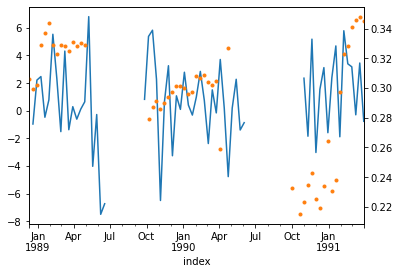

In [17]:
xl2['31'].avg.diff().plot()
xl['31'].avg.plot(style='.', secondary_y=True)

In [18]:
df = pd.DataFrame({'depth_diff':xl2['31'].avg.diff(), 'density':xl['31'].avg,'depth':xl2['31'].avg}, index=None, columns=None)
df.dropna(inplace=True)
df[df < 0] = 0
cols = ['depth_diff']
df[cols] = df[df[cols] != 0][cols]
df.dropna(inplace=True)
df

,depth_diff,density,depth
index,,,
1988-12-30,2.215686,0.302,28.215686
1989-01-09,2.470588,0.329,30.686275
1989-01-29,0.784314,0.344,31.000000
1989-02-08,5.529412,0.329,36.529412
1989-02-18,2.313725,0.323,38.843137
1989-03-10,4.313725,0.328,41.647059
1989-03-30,0.294118,0.331,40.568627
1989-04-19,0.117647,0.330,40.078431
1989-04-29,0.647059,0.329,40.725490


In [19]:
df2 = pd.DataFrame({'depth_diff':xl2['30'].avg.diff(), 'density':xl['30'].avg,'depth':xl2['30'].avg}, index=None, columns=None)
df2.dropna(inplace=True)
df2[df2 < 0] = 0
cols = ['depth_diff']
df2[cols] = df2[df2[cols] != 0][cols]
df2.dropna(inplace=True)
df2

,depth_diff,density,depth
index,,,
1987-11-20,2.058824,0.3270,18.686275
1987-12-10,1.352941,0.2780,19.215686
1988-02-18,0.656863,0.3065,23.519608
1988-03-19,3.411765,0.3460,26.392157
1988-03-29,0.549020,0.3280,26.941176
1988-04-18,3.196078,0.3580,27.588235
1988-09-05,7.960784,0.2230,17.019608
1988-09-15,1.254902,0.2370,18.274510
1988-10-05,0.921569,0.3440,17.411765


In [20]:
df3 = pd.DataFrame({'depth_diff':xl2['26'].avg.diff(), 'density':xl['26'].avg,'depth':xl2['26'].avg}, index=None, columns=None)
df3.dropna(inplace=True)
df3[df3 < 0] = 0
cols = ['depth_diff']
df3[cols] = df3[df3[cols] != 0][cols]
df3.dropna(inplace=True)
df3

,depth_diff,density,depth
index,,,
1983-09-18,2.450980,0.246,18.019608
1983-10-08,0.176471,0.336,17.529412
1983-10-18,0.372549,0.340,17.901961
1983-10-28,0.411765,0.346,18.313725
1983-11-07,3.058824,0.328,21.372549
1983-11-17,1.137255,0.320,22.509804
1983-11-27,0.627451,0.328,23.137255
1983-12-17,2.137255,0.324,24.823529
1983-12-27,0.764706,0.300,25.588235


In [21]:
df4 = pd.DataFrame({'depth_diff':xl2['18'].avg.diff(), 'density':xl['18'].avg,'depth':xl2['18'].avg}, index=None, columns=None)
df4.dropna(inplace=True)
df4[df4 < 0] = 0
cols = ['depth_diff']
df4[cols] = df4[df4[cols] != 0][cols]
df4.dropna(inplace=True)
df4

,depth_diff,density,depth
index,,,


In [22]:
import scipy as sp
from scipy import stats

X = list(df.depth_diff) + list(df2.depth_diff) + list(df3.density)
Y = list(df.density) + list(df2.density) + list(df3.density) 

res = sp.stats.linregress(X, Y)
res

LinregressResult(slope=-0.008998076709561736, intercept=0.31505818763528437, rvalue=-0.39516468216157685, pvalue=4.319883769145482e-05, stderr=0.0021022544460959805)

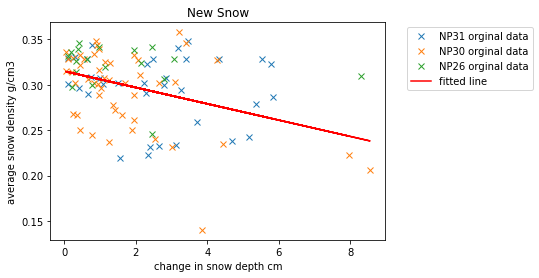

In [23]:
plt.plot(df.depth_diff,df.density, 'x', label='NP31 orginal data')
plt.plot(df2.depth_diff,df2.density, 'x', label='NP30 orginal data')
plt.plot(df3.depth_diff,df3.density, 'x', label='NP26 orginal data')

#line of best fit
Z = []
for point in X:
    Z.append(res.intercept + res.slope*point)

plt.plot(X, Z, 'r', label='fitted line')

plt.xlabel('change in snow depth cm')
plt.ylabel('average snow density g/cm3')
plt.title('New Snow')

plt.legend()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

this graphs shows the density of new snow. Density and depth were measured on the same day. It is the change in depth over about 10 days and the density of the snow following positive changes in depth. The data shows a negative correlation between density and change in snow depth. As the snow depth increases you tend to get less dense snow. this makes sense as less dense snow compacts less 